# Gradient Descent with PyTorch

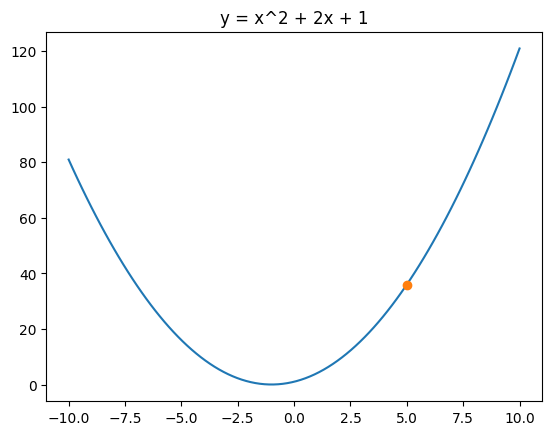

In [ ]:
import torch

x = torch.tensor(5, requires_grad=True, dtype=torch.float32)
# quadratic function
y = x**2 + 2*x + 1

# plot the function from x = 0 to x = 10
import matplotlib.pyplot as plt
import numpy as np
x_plt = np.linspace(-10, 10, 100)
y_plt = x_plt**2 + 2*x_plt + 1
plt.plot(x_plt, y_plt)
plt.title('y = x^2 + 2x + 1')

# Plot the x, y
plt.plot(x.detach().numpy(), y.detach().numpy(), 'o')
plt.show()


What is the gradient at x = 5?

In the previous notebook, we have learned the hardway:

- Calculate the derivative of a function
- Apply the derivative to $x$ to find the gradient at $x$

But in PyTorch, we can do it in a much easier way.

In [ ]:
x = torch.tensor(5, requires_grad=True, dtype=torch.float32)
y = x**2 + 2*x + 1

# compute gradient
y.backward()

# print gradient
print(x.grad)

tensor(12.)


`backward()` does backward propagation to calculate the gradient. And the result is stored in `x.grad`.

Notice the `requires_grad=True` in the definition of `x`. It tells PyTorch to calculate the gradient of `x` during backward propagation. If we don't set it, `x.grad` will raise an error.

In [ ]:
x = torch.tensor(5, requires_grad=False, dtype=torch.float32)
y = x**2 + 2*x + 1

# compute gradient
y.backward()

# Error
print(x.grad)

Let's find the minimum value like before. Remember the steps:

1. Initialize $x$ at a random value
1. Calculate the gradient at $x$
1. Update $x$ with the gradient with a learning rate $\alpha$ ($x = x - \alpha \cdot \text{gradient}$)
1. Repeat 2 and 3 until the gradient is close to 0


In [ ]:
# Randomly choose x
x = torch.tensor(5, requires_grad=True, dtype=torch.float32)
alpha = 0.1

for i in range(10):
    y = x**2 + 2*x + 1
    y.backward()

    with torch.no_grad():
        x -= alpha * x.grad
        # gradient is accumulated, so we need to zero it
        x.grad.zero_()

    print(x.detach().numpy(), y.detach().numpy())


3.8 36.0
2.84 23.039999
2.072 14.7456
1.4576 9.437184
0.96607995 6.039798
0.57286394 3.8654704
0.25829116 2.473901
0.006632924 1.5832967
-0.19469367 1.0133098
-0.35575494 0.6485183


Let's visualize the process.

3.8 36.0
2.84 23.039999
2.072 14.7456
1.4576 9.437184
0.96607995 6.039798
0.57286394 3.8654704
0.25829116 2.473901
0.006632924 1.5832967
-0.19469367 1.0133098
-0.35575494 0.6485183


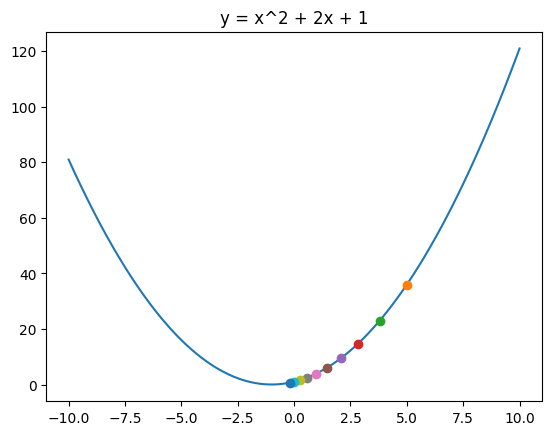

In [ ]:
# Randomly choose x
x = torch.tensor(5, requires_grad=True, dtype=torch.float32)
alpha = 0.1

x_plt = np.linspace(-10, 10, 100)
y_plt = x_plt**2 + 2*x_plt + 1
plt.plot(x_plt, y_plt)
plt.title('y = x^2 + 2x + 1')

# Plot the
for i in range(10):
    y = x**2 + 2*x + 1
    plt.plot(x.detach().numpy(), y.detach().numpy(), 'o')

    y.backward()

    with torch.no_grad():
        x -= alpha * x.grad
        # gradient is accumulated, so we need to zero it
        x.grad.zero_()

    print(x.detach().numpy(), y.detach().numpy())

plt.show()


## Optimizer

In the previous example, we have to manually update $x$ with the gradient. But in PyTorch, we can use an optimizer to do it for us.

`torch.optim.SGD` is a simple optimizer that does gradient descent. It takes the parameters to optimize and the learning rate as arguments.

In [ ]:
# Randomly choose x
x = torch.tensor(5, requires_grad=True, dtype=torch.float32)
alpha = 0.1
optimizer = torch.optim.SGD([x], lr=alpha)

for i in range(10):
    y = x**2 + 2*x + 1
    y.backward()

    optimizer.step()
    optimizer.zero_grad()

    print(x.detach().numpy(), y.detach().numpy())


3.8 36.0
2.84 23.039999
2.072 14.7456
1.4576 9.437184
0.96607995 6.039798
0.57286394 3.8654704
0.25829116 2.473901
0.006632924 1.5832967
-0.19469367 1.0133098
-0.35575494 0.6485183


We get the same result as before, but with less code (without manually updating $x$).

There are some other optimizers, such as `torch.optim.Adam` and `torch.optim.RMSprop`. You can find more in the [documentation](https://pytorch.org/docs/stable/optim.html).

## Building Simple Neural Networks

We now know how to calculate the gradient of a function and use an optimizer to find the minimum value. We can use this knowledge to build a simple neural network.

Let's build `NOT` gate with a single neuron, similar to what we have [here](https://docs.google.com/spreadsheets/d/15JWbRFB4k5CNcfD-2hduHHssXIc1SGhNVSpu_30wVAw/edit#gid=333844254)

In [ ]:
x = torch.tensor([[0], [1]], dtype=torch.float32)
y = torch.tensor([1, 0], dtype=torch.float32)

w = torch.tensor([[3]], requires_grad=True, dtype=torch.float32)
b = torch.tensor([[1]], requires_grad=True, dtype=torch.float32)

a = torch.sigmoid(w@x.T + b)

print("a = ", a)

loss = torch.square(a - y)
print("loss = ", loss.detach().numpy())

loss = torch.sum(loss)
print("sum loss = ", loss.detach().numpy())

loss.backward()

print("w_grad = ", w.grad)
print("b_grad = ", b.grad)

a =  tensor([[0.7311, 0.9820]], grad_fn=<SigmoidBackward0>)
loss =  [[0.07232948 0.96435106]]
sum loss =  1.0366806
w_grad =  tensor([[0.0347]])
b_grad =  tensor([[-0.0711]])


That's similar to what we got in the Google Sheet. Do check it out if you haven't :)

Now, we just need to iterate.

In [ ]:
import torch

x = torch.tensor([[0], [1]], dtype=torch.float32)
y = torch.tensor([1, 0], dtype=torch.float32)

w = torch.tensor([[3]], requires_grad=True, dtype=torch.float32)
b = torch.tensor([[1]], requires_grad=True, dtype=torch.float32)

optimizer = torch.optim.SGD([w, b], lr=10)

for i in range(5):
    print("Iteration ", i)
    print("w = ", w.detach().numpy())
    print("b = ", b.detach().numpy())

    a = torch.sigmoid(w@x.T + b)

    print("a = ", a)

    loss = torch.square(a - y)
    print("loss = ", loss.detach().numpy())

    loss = torch.mean(loss)
    print("mean loss = ", loss.detach().numpy())

    loss.backward()

    print("w_grad = ", w.grad)
    print("b_grad = ", b.grad)

    # Update w, b
    optimizer.step()
    optimizer.zero_grad()

    print()

Iteration  0
w =  [[3.]]
b =  [[1.]]
a =  tensor([[0.7311, 0.9820]], grad_fn=<SigmoidBackward0>)
loss =  [[0.07232948 0.96435106]]
mean loss =  0.5183403
w_grad =  tensor([[0.0173]])
b_grad =  tensor([[-0.0355]])

Iteration  1
w =  [[2.8265495]]
b =  [[1.3553205]]
a =  tensor([[0.7950, 0.9850]], grad_fn=<SigmoidBackward0>)
loss =  [[0.0420258  0.97014576]]
mean loss =  0.50608575
w_grad =  tensor([[0.0146]])
b_grad =  tensor([[-0.0188]])

Iteration  2
w =  [[2.6806374]]
b =  [[1.5435127]]
a =  tensor([[0.8240, 0.9856]], grad_fn=<SigmoidBackward0>)
loss =  [[0.03098487 0.97135484]]
mean loss =  0.50116986
w_grad =  tensor([[0.0140]])
b_grad =  tensor([[-0.0115]])

Iteration  3
w =  [[2.5405035]]
b =  [[1.6586863]]
a =  tensor([[0.8401, 0.9852]], grad_fn=<SigmoidBackward0>)
loss =  [[0.02558029 0.970647  ]]
mean loss =  0.49811363
w_grad =  tensor([[0.0144]])
b_grad =  tensor([[-0.0071]])

Iteration  4
w =  [[2.3969853]]
b =  [[1.7300583]]
a =  tensor([[0.8494, 0.9841]], grad_fn=<Sigmoid

Compare it with the Google Sheet. It's the same!

## Simpler Way to Build Neural Networks

Our code looks much simpler than before. But we can make it even simpler with `torch.nn`.

In [ ]:
import torch

x = torch.tensor([[0], [1]], dtype=torch.float32)
y = torch.tensor([1, 0], dtype=torch.float32)

class NotGate(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.w = torch.nn.Parameter(torch.tensor([[3.]]))
        self.b = torch.nn.Parameter(torch.tensor([[1.]]))

    def forward(self, x):
        return torch.sigmoid(self.w@x.T + self.b)

model = NotGate()
optimizer = torch.optim.SGD(model.parameters(), lr=10)

for i in range(5):
    print("Iteration ", i)
    print("w = ", model.w.detach().numpy())
    print("b = ", model.b.detach().numpy())

    model.train()
    a = model(x)

    print("a = ", a)

    loss = torch.square(a - y)
    print("loss = ", loss.detach().numpy())

    loss = torch.mean(loss)
    print("mean loss = ", loss.detach().numpy())

    loss.backward()

    print("w_grad = ", model.w.grad)
    print("b_grad = ", model.b.grad)

    # Update w, b
    optimizer.step()
    optimizer.zero_grad()

    print()

Iteration  0
w =  [[3.]]
b =  [[1.]]
a =  tensor([[0.7311, 0.9820]], grad_fn=<SigmoidBackward0>)
loss =  [[0.07232948 0.96435106]]
mean loss =  0.5183403
w_grad =  tensor([[0.0173]])
b_grad =  tensor([[-0.0355]])

Iteration  1
w =  [[2.8265495]]
b =  [[1.3553205]]
a =  tensor([[0.7950, 0.9850]], grad_fn=<SigmoidBackward0>)
loss =  [[0.0420258  0.97014576]]
mean loss =  0.50608575
w_grad =  tensor([[0.0146]])
b_grad =  tensor([[-0.0188]])

Iteration  2
w =  [[2.6806374]]
b =  [[1.5435127]]
a =  tensor([[0.8240, 0.9856]], grad_fn=<SigmoidBackward0>)
loss =  [[0.03098487 0.97135484]]
mean loss =  0.50116986
w_grad =  tensor([[0.0140]])
b_grad =  tensor([[-0.0115]])

Iteration  3
w =  [[2.5405035]]
b =  [[1.6586863]]
a =  tensor([[0.8401, 0.9852]], grad_fn=<SigmoidBackward0>)
loss =  [[0.02558029 0.970647  ]]
mean loss =  0.49811363
w_grad =  tensor([[0.0144]])
b_grad =  tensor([[-0.0071]])

Iteration  4
w =  [[2.3969853]]
b =  [[1.7300583]]
a =  tensor([[0.8494, 0.9841]], grad_fn=<Sigmoid

## Even Much More Simpler Way

We can make it even simpler with `torch.nn.Linear`.

In [ ]:
import torch

x = torch.tensor([[0], [1]], dtype=torch.float32)
y = torch.tensor([1, 0], dtype=torch.float32)

class NotGate(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = torch.nn.Linear(in_features=1, out_features=1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

model = NotGate()
optimizer = torch.optim.SGD(model.parameters(), lr=10)

for i in range(5):
    print("Iteration ", i)
    print("w = ", model.linear.weight.detach().numpy())
    print("b = ", model.linear.bias.detach().numpy())

    model.train()
    a = model(x)

    print("a = ", a)

    loss = torch.square(a - y)
    print("loss = ", loss.detach().numpy())

    loss = torch.mean(loss)
    print("mean loss = ", loss.detach().numpy())

    loss.backward()

    print("w_grad = ", model.linear.weight.grad)
    print("b_grad = ", model.linear.bias.grad)

    # Update w, b
    optimizer.step()
    optimizer.zero_grad()

    print()

Iteration  0
w =  [[-0.08132863]]
b =  [0.9673029]
a =  tensor([[0.7246],
        [0.7081]], grad_fn=<SigmoidBackward0>)
loss =  [[0.07585529 0.5250185 ]
 [0.08522972 0.5013471 ]]
mean loss =  0.29686266
w_grad =  tensor([[0.0430]])
b_grad =  tensor([0.0878])

Iteration  1
w =  [[-0.5114101]]
b =  [0.0890395]
a =  tensor([[0.5222],
        [0.3959]], grad_fn=<SigmoidBackward0>)
loss =  [[0.22824968 0.27274   ]
 [0.3648769  0.15677612]]
mean loss =  0.25566065
w_grad =  tensor([[-0.0249]])
b_grad =  tensor([-0.0193])

Iteration  2
w =  [[-0.26254913]]
b =  [0.28239763]
a =  tensor([[0.5701],
        [0.5050]], grad_fn=<SigmoidBackward0>)
loss =  [[0.18478484 0.32505268]
 [0.24506265 0.25498658]]
mean loss =  0.2524717
w_grad =  tensor([[0.0012]])
b_grad =  tensor([0.0184])

Iteration  3
w =  [[-0.27495283]]
b =  [0.09810886]
a =  tensor([[0.5245],
        [0.4559]], grad_fn=<SigmoidBackward0>)
loss =  [[0.22609304 0.27510822]
 [0.29604056 0.20784836]]
mean loss =  0.25127253
w_grad =  t

Here we just need to define the input size and output size. We don't need to define the weights and bias manually!